In [76]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [77]:
data = pd.read_csv('5205 data.csv')
data.head()

,ride_count,temperature,windSpeed,visibility,distance,humidity
0,1716,18.91,3.16,10.000,0.44,0.94
1,1871,18.97,3.44,9.670,0.44,0.75
2,1872,19.28,3.60,9.868,0.44,0.73
3,1872,20.01,3.39,9.968,0.44,0.70
4,1872,20.07,4.21,9.725,0.44,0.84


In [80]:
missing_values = data.isnull().sum()
data_statistics = data.describe()
missing_values, data_statistics

(ride_count     0
 temperature    0
 windSpeed      0
 visibility     0
 distance       0
 humidity       0
 dtype: int64,
         ride_count  temperature   windSpeed  visibility    distance  \
 count   332.000000    332.00000  332.000000  332.000000  332.000000   
 mean   2087.563253     39.39747    5.811536    8.434747    2.190271   
 std     821.646567      7.09568    3.190488    2.622018    0.932632   
 min      84.000000     18.91000    0.450000    0.717000    0.440000   
 25%    1872.000000     35.64500    3.175000    8.283250    1.300000   
 50%    1872.000000     40.46000    5.225000    9.857500    2.360000   
 75%    1872.000000     43.64250    8.110000    9.980250    2.965000   
 max    5616.000000     57.22000   15.000000   10.000000    4.430000   
 
          humidity  
 count  332.000000  
 mean     0.740572  
 std      0.142059  
 min      0.380000  
 25%      0.640000  
 50%      0.710000  
 75%      0.890000  
 max      0.960000  )

/Users/ariel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


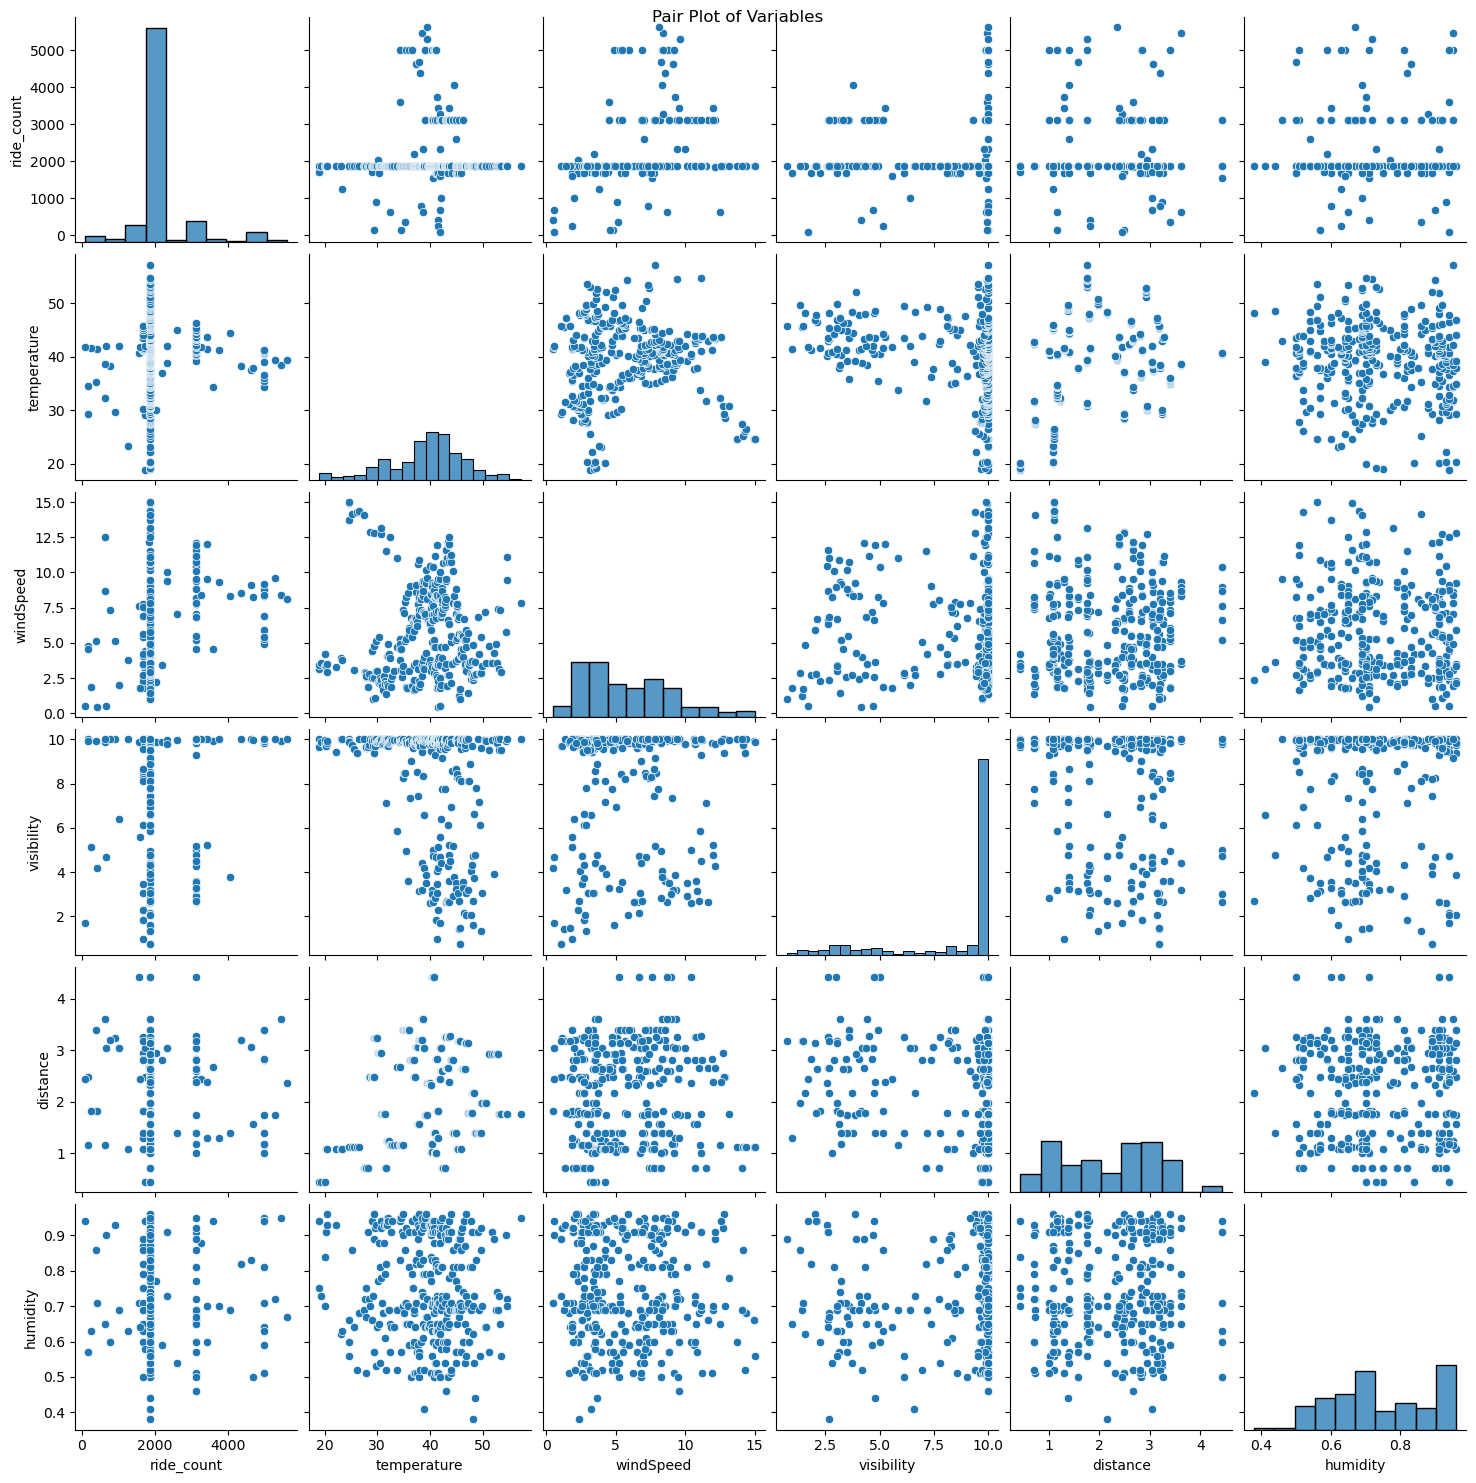

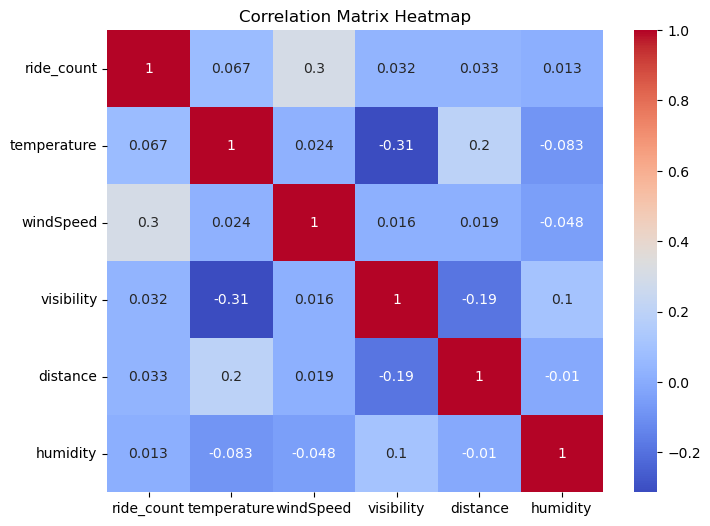

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
# Pair plot to visualize relationships between variables
sns.pairplot(data)
plt.suptitle('Pair Plot of Variables', verticalalignment='bottom')
plt.show()

# Correlation matrix heatmap
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [81]:
import statsmodels.api as sm
import numpy as np

# Assuming 'data' is your DataFrame containing the variables
X = data[['temperature', 'windSpeed', 'visibility', 'distance', 'humidity']]  # Independent variables
y = data['ride_count']

# Check for and handle infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.dropna()
y = y[X.index]  # Adjust the dependent variable accordingly

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get and print the model summary
model_summary = model.summary()
print(model_summary)

# Get the residuals
residuals = model.resid

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     6.995
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           3.17e-06
Time:                        18:09:41   Log-Likelihood:                -2681.8
No. Observations:                 332   AIC:                             5376.
Df Residuals:                     326   BIC:                             5398.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         998.6098    419.078      2.383      

/var/folders/6c/c3drdrw92fx3p3hyy6bp617m0000gn/T/ipykernel_42741/261350170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
import pandas as pd
import statsmodels.api as sm
file_path = '5205 data.csv'
data = pd.read_csv(file_path)
X = data[['temperature', 'windSpeed', 'visibility', 'distance', 'humidity']]
y = data['ride_count']
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
residuals = ols_model.resid
weights = 1 / (residuals ** 2)
wls_model = sm.WLS(y, X, weights=weights).fit()
wls_model_summary = wls_model.summary()
print(wls_model_summary)

In [82]:
# Jarque-Bera test
from scipy.stats import jarque_bera
jb_stat, jb_p_value = jarque_bera(residuals)
print(f"Jarque-Bera Test Statistic: {jb_stat}")
print(f"P-value: {jb_p_value}")


Jarque-Bera Test Statistic: 685.2898776443143
P-value: 1.5530799657011726e-149


In [83]:
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")


Durbin-Watson Statistic: 1.9614019717426319


In [84]:
# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_stat, bp_p_value, _, _ = het_breuschpagan(residuals, sm.add_constant(X))
print(f"Breusch-Pagan Test Statistic: {bp_stat}")
print(f"P-value: {bp_p_value}")


Breusch-Pagan Test Statistic: 17.818472123634933
P-value: 0.003182728164133391


In [90]:
# White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid, model.model.exog)
white_test_statistic, white_p_value = white_test[:2]
print(f"White's test statistic: {white_test_statistic}")
print(f"White's test p-value: {white_p_value}")

White's test statistic: 42.9754515056171
White's test p-value: 0.0020596465121453075


In [86]:
# Get the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif_data)

VIF:
      Variable        VIF
0        const  94.190275
1  temperature   1.138547
2    windSpeed   1.003904
3   visibility   1.139015
4     distance   1.061855
5     humidity   1.016285


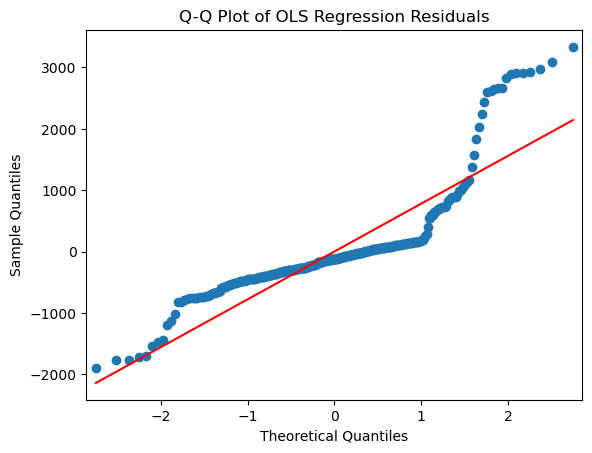

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
qq_plot = qqplot(model.resid, line='s')
plt.title('Q-Q Plot of OLS Regression Residuals')
plt.show()

/var/folders/6c/c3drdrw92fx3p3hyy6bp617m0000gn/T/ipykernel_42741/2152546946.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


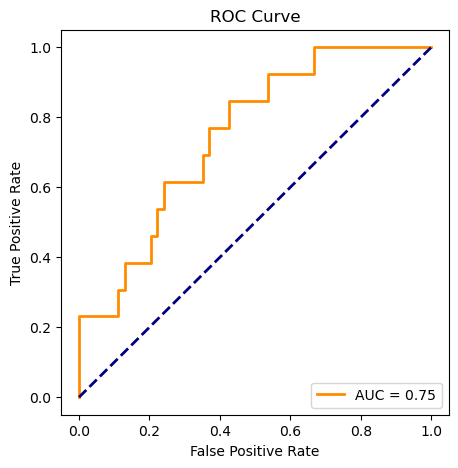

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Assuming 'data' is your DataFrame containing the variables
X = data[['temperature', 'windSpeed', 'visibility', 'distance', 'humidity']]  # Independent variables
y = (data['ride_count'] > data['ride_count'].median()).astype(int)  # Binary classification based on median

# Check for and handle infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.dropna()
y = y[X.index]  # Adjust the dependent variable accordingly

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model on the training set
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_probs = logreg_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


/Users/ariel/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:268: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  fig.tight_layout()
/Users/ariel/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:268: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


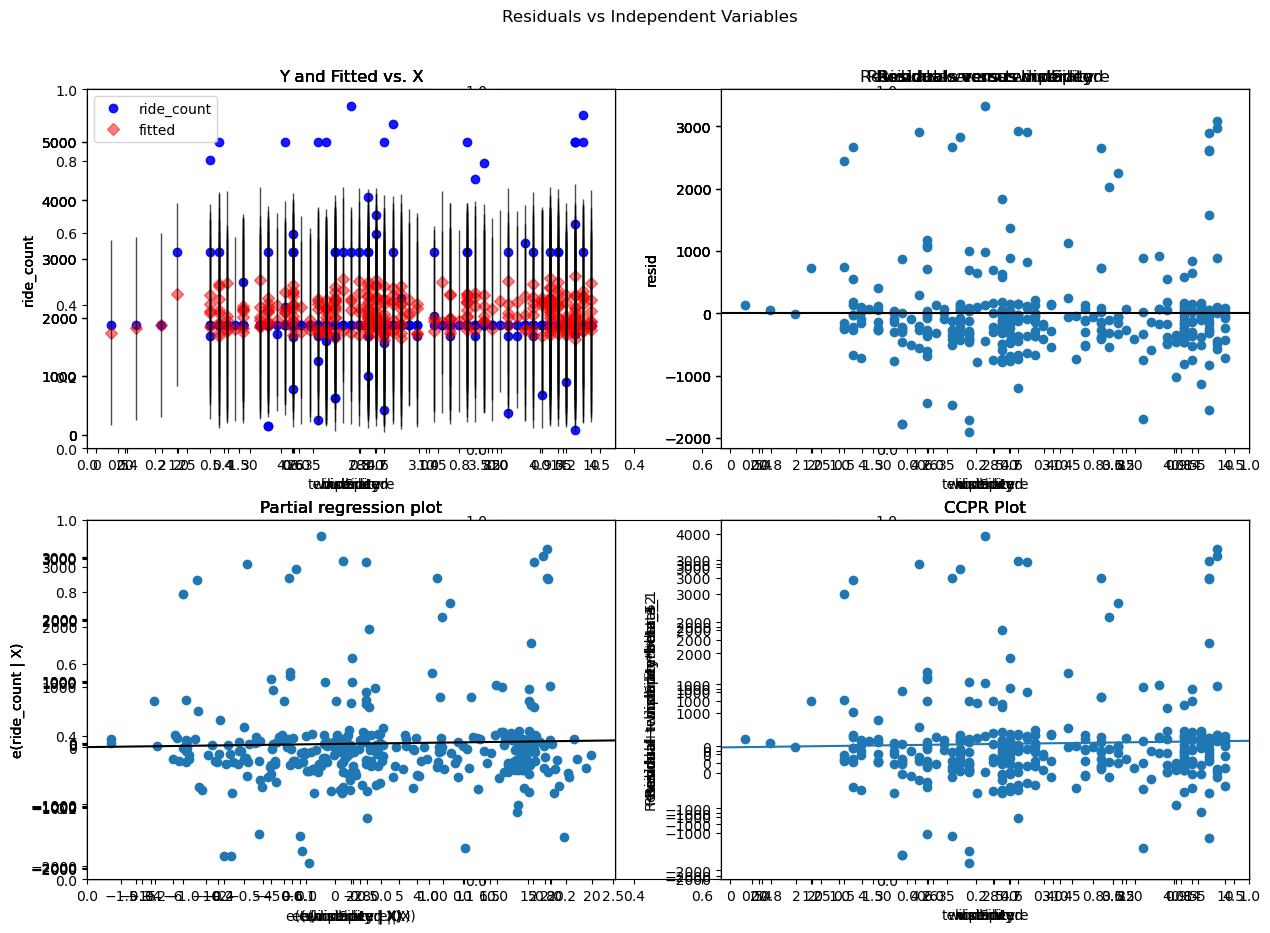

In [89]:
# Create a residual plot
from statsmodels.graphics.regressionplots import plot_regress_exog
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, var in enumerate(X.columns[1:]):
    plot_regress_exog(model, var, fig=fig)

plt.suptitle("Residuals vs Independent Variables")
plt.show()